In [3]:
import pandas as pd

df = pd.read_csv("diamonds.csv")

# Dataanalys – Diamanter för Guldfynd

# Bakgrund
Guldfynd, med butiker i hela Norden, överväger att börja sälja diamanter utöver sina nuvarande produkter i guld och silver.

# Syfte
Syftet med denna analys är att undersöka ett diamant dataset för att ta fram insikter och ge rekommendationer kring en eventuell satsning på diamanter.


In [6]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [14]:
df.duplicated().sum()

#finns 145 duplicerade rader. tar bort dom med df = df.drop_duplicates()


np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [15]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

# för att se ifall det fins felaktika 0 värden


,carat,cut,color,clarity,depth,table,price,x,y,z


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


## Förklaring av viktiga kolumner

**carat** – diamantens vikt
**cut** – kvalitet på slipningen (t.ex. Fair, Good, Ideal)
**color** – diamantens färg (D = bäst, J = sämst)
**clarity** – klarhet, alltså hur många inre fel diamanterna har
**price** – priset i USD
**depth** – total djup-procent
**table** – bredden på ovansidan i förhållande till bredden totalt
**x, y, z** – dimensioner i mm


## Datastädning

Innan analysen kontrollerades och städades datan:

 Inga saknade värden fanns i datasetet.
 Alla kategoriska kolumner (`cut`, `color`, `clarity`) innehöll endast giltiga värden.
 145 dubbletter hittades och togs bort.
 Rader med 0 i någon av dimensionerna (`x`, `y`, `z`) togs bort då dessa är ogiltiga för fysiska mått på diamanter.

Efter dessa åtgärder är datan redo för analys.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# Prisdistribution

Här ser man hur priset är fördelat. man ser att majoriteten av diamanterna kostar under 5 000 USD, men några sticker ut med betydligt högre priser.


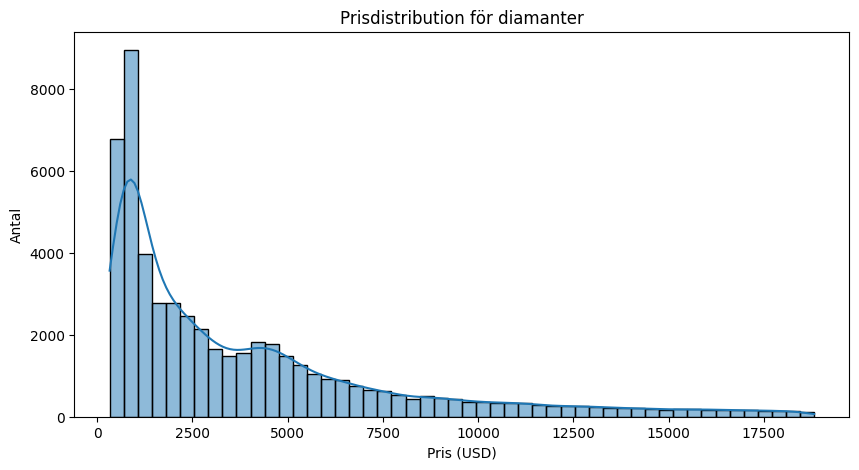

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Prisdistribution för diamanter")
plt.xlabel("Pris (USD)")
plt.ylabel("Antal")
plt.show()

# Pris i förhållande till carat

Som väntat finns ett tydligt samband ju högre carat, desto högre pris. Men sambandet är inte helt linjärt vissa tyngre stenar har inte lika höga priser, vilket kan bero på kvalitet eller klarhet.


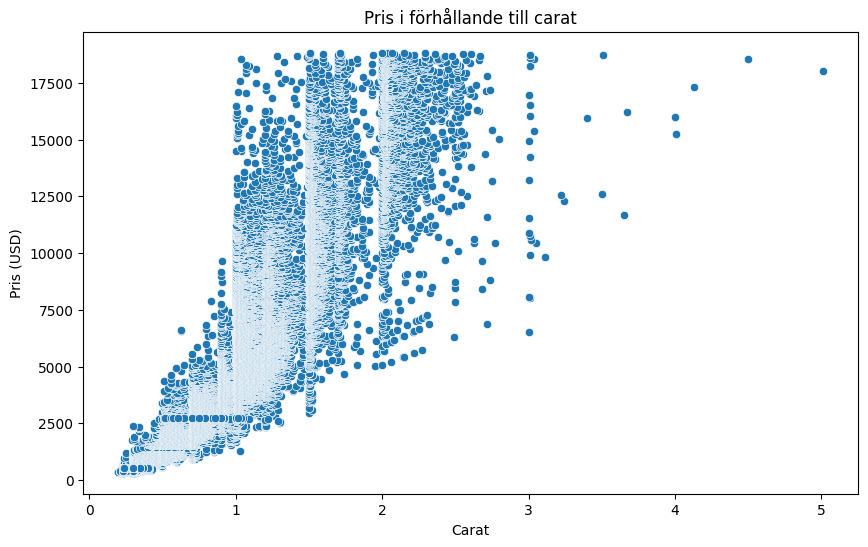

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price')
plt.title("Pris i förhållande till carat")
plt.xlabel("Carat")
plt.ylabel("Pris (USD)")
plt.show()


# Genomsnittligt pris per slipning

Här ser man hur priset skiljer sig beroende på slipningskvalitet.
premium och Ideal är vanligast och tenderar att ha högre pris än exempelvis Fair.


Premium diamanterna har det högsta genomsnittliga priset, vilket innebär att kunder värdesätter denna slipning högt. Fair visar ett relativt högt snittpris också men det kan bero på färre datapunkter.



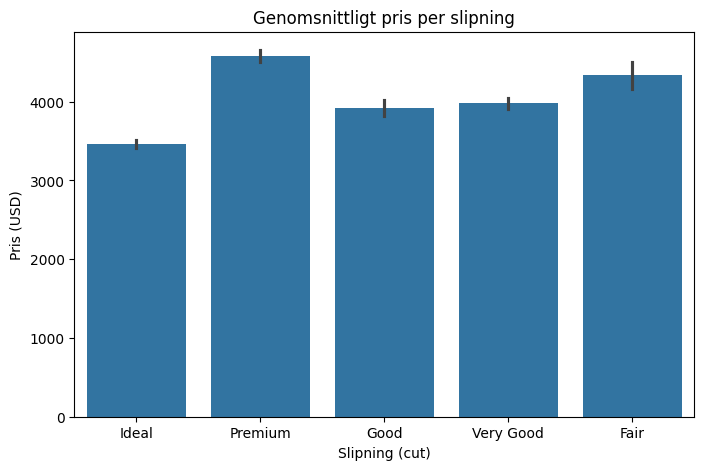

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='cut', y='price', estimator='mean')
plt.title("Genomsnittligt pris per slipning")
plt.ylabel("Pris (USD)")
plt.xlabel("Slipning (cut)")
plt.show()


# Antal diamanter per färg

Färg G och E är de mest förekommande i datasetet. Detta kan tyda på att dessa är populära val bland kunder eller enklare att hitta.


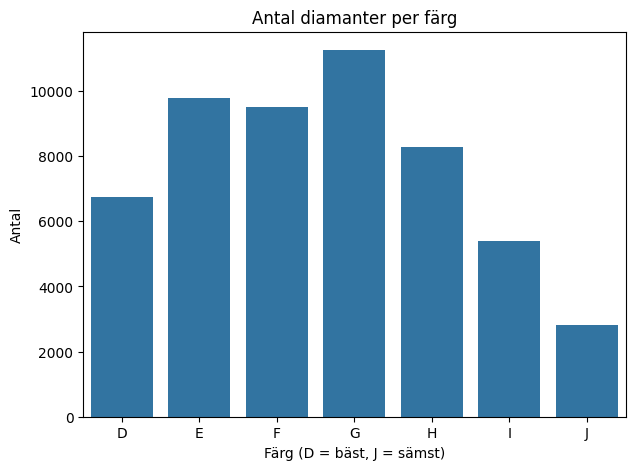

In [29]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='color', order=sorted(df['color'].unique()))
plt.title("Antal diamanter per färg")
plt.xlabel("Färg (D = bäst, J = sämst)")
plt.ylabel("Antal")
plt.show()


# Genomsnittligt pris per klarhet

Diagrammet nedan visar hur priset i snitt skiljer sig mellan olika grader av klarhet. Klara diamanter med färre inre fel tex IF och VVS1 har generellt högre pris. Det finns dock variation och överlapp, vilket visar att priset påverkas av fler faktorer än klarhet.


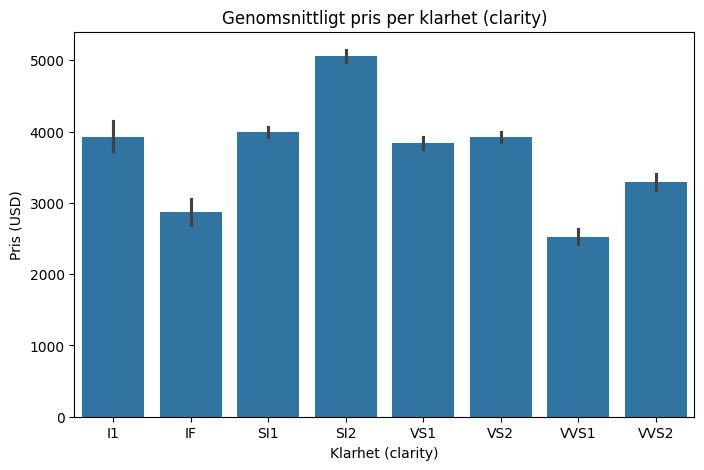

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='clarity', y='price', estimator='mean', order=sorted(df['clarity'].unique()))
plt.title("Genomsnittligt pris per klarhet (clarity)")
plt.ylabel("Pris (USD)")
plt.xlabel("Klarhet (clarity)")
plt.show()


# Prisvariation per slipning
Boxploten visar spridningen i pris för varje slipningskvalitet. Den visar både medianen "linjen i mitten", över och undre kvartiler och eventuella outliers. Premium och Ideal har inte bara höga snittpriser utan också större spridning  vilket tyder på att variationen inom dessa grupper är större.


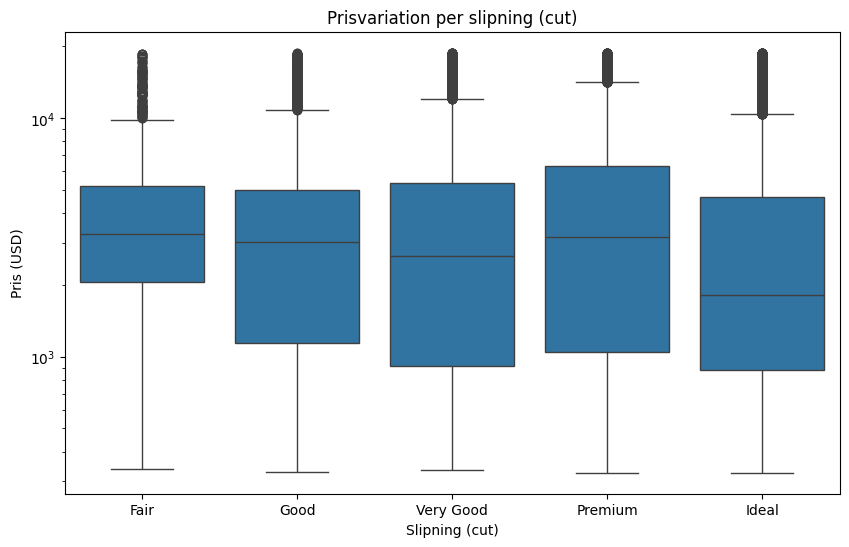

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Prisvariation per slipning (cut)")
plt.ylabel("Pris (USD)")
plt.xlabel("Slipning (cut)")
plt.yscale('log')  # Lägg till om du vill jämna ut effekten av outliers
plt.show()
